In [1]:
import os
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_URL = "https://raw.githubusercontent.com/PabloJRW/used-car-price-prediction/main/datasets/raw/used_cars.csv"
df = pd.read_csv(DATA_URL, delimiter=',')
df.head(10)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"
5,Acura,ILX 2.4L,2016,"136,397 mi.",Gasoline,2.4 Liter,F,Silver,Ebony.,None reported,NaN,"$14,798"
6,Audi,S3 2.0T Premium Plus,2017,"84,000 mi.",Gasoline,292.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,Blue,Black,None reported,Yes,"$31,000"
7,BMW,740 iL,2001,"242,000 mi.",Gasoline,282.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,A/T,Green,Green,None reported,Yes,"$7,300"
8,Lexus,RC 350 F Sport,2021,"23,436 mi.",Gasoline,311.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,6-Speed A/T,Black,Black,None reported,Yes,"$41,927"
9,Tesla,Model X Long Range Plus,2020,"34,000 mi.",NaN,534.0HP Electric Motor Electric Fuel System,A/T,Black,Black,None reported,Yes,"$69,950"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [4]:
# ¿Cuántos valores únicos tiene cada variable categórica?
for col in df.select_dtypes('object'):
    print(f"{col.ljust(15)}: {df[col].nunique()}")

brand          : 57
model          : 1898
milage         : 2818
fuel_type      : 7
engine         : 1146
transmission   : 62
ext_col        : 319
int_col        : 156
accident       : 2
clean_title    : 1
price          : 1569


In [5]:
df2 = pd.DataFrame()

### Price

In [6]:
# Eliminando caracteres y convirtiendo la variable 'price' a numérica
df['price'] = df['price'].str.replace("$", "").str.replace(",", "").astype(int)
df2['price'] = df['price']

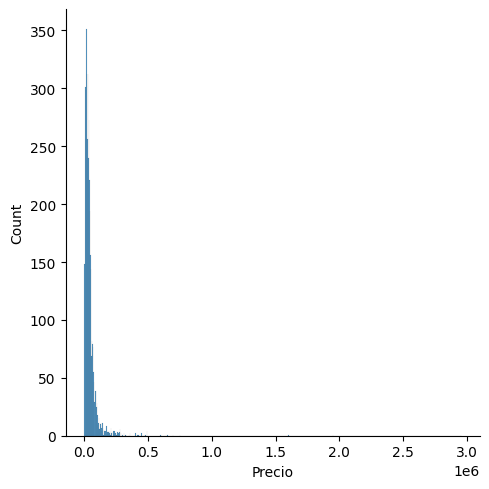

In [7]:
sns.displot(df['price'])
plt.savefig(os.path.join('..','img','price'))
plt.xlabel('Precio')
plt.show()

In [8]:
df['price'].describe()

count    4.009000e+03
mean     4.455319e+04
std      7.871064e+04
min      2.000000e+03
25%      1.720000e+04
50%      3.100000e+04
75%      4.999000e+04
max      2.954083e+06
Name: price, dtype: float64

In [9]:
df[df['price'] >= 500000].sample(5)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
624,Rolls-Royce,Cullinan,2022,398 mi.,Gasoline,6.7L V12 48V GDI DOHC Twin Turbo,8-Speed Automatic,Silver,Charles Blue,None reported,Yes,695000
3046,Porsche,Carrera GT Base,2005,"4,400 mi.",Gasoline,605.0HP 5.7L 10 Cylinder Engine Gasoline Fuel,6-Speed M/T,Gray,Black,None reported,Yes,1599000
979,Lamborghini,Aventador SVJ Base,2019,"6,929 mi.",Gasoline,759.0HP 6.5L 12 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,649999
1356,Lamborghini,Aventador SVJ Base,2021,"6,987 mi.",Gasoline,6.5L V12 48V MPFI DOHC,7-Speed,–,Nero Ade,None reported,Yes,749950
693,Maserati,Quattroporte Base,2005,"32,000 mi.",Gasoline,394.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Red,Beige,At least 1 accident or damage reported,Yes,2954083


<Figure size 640x480 with 0 Axes>

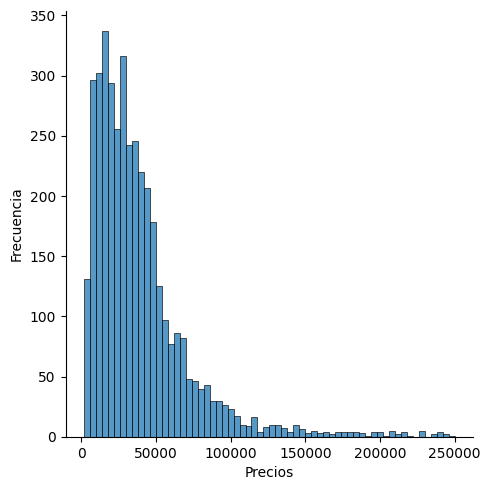

In [10]:
plt.figure()
sns.displot(df[df['price'] <= 250000]['price'])
plt.xlabel('Precios')
plt.ylabel('Frecuencia')
plt.show()

### Brand

In [11]:
# Cuántas marcas de autos?
df['brand'].nunique()

57

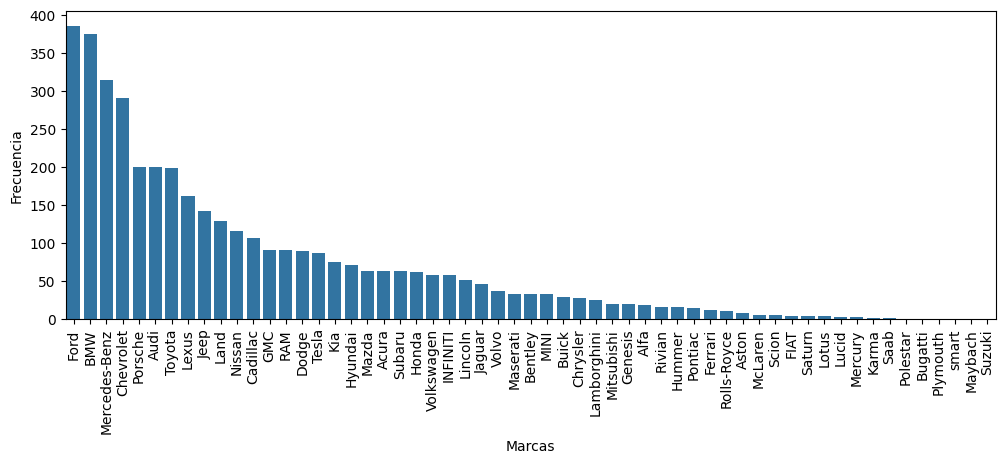

In [12]:
brand_count = df['brand'].value_counts()

plt.figure(figsize=(12, 4))
sns.barplot(x=brand_count.index, y=brand_count.values)
plt.xticks(rotation=90)
plt.xlabel('Marcas')
plt.ylabel('Frecuencia')
plt.savefig(os.path.join('..','img','brand_dist'))
plt.show()

In [13]:
df['brand'].value_counts()

brand
Ford             386
BMW              375
Mercedes-Benz    315
Chevrolet        292
Porsche          201
Audi             200
Toyota           199
Lexus            163
Jeep             143
Land             130
Nissan           116
Cadillac         107
GMC               91
RAM               91
Dodge             90
Tesla             87
Kia               76
Hyundai           72
Mazda             64
Acura             64
Subaru            64
Honda             63
Volkswagen        59
INFINITI          59
Lincoln           52
Jaguar            47
Volvo             38
Maserati          34
Bentley           33
MINI              33
Buick             30
Chrysler          28
Lamborghini       26
Mitsubishi        20
Genesis           20
Alfa              19
Rivian            17
Hummer            16
Pontiac           15
Ferrari           12
Rolls-Royce       11
Aston              9
McLaren            6
Scion              6
FIAT               5
Saturn             5
Lotus              4
Lucid  

### Model Year

<Figure size 640x480 with 0 Axes>

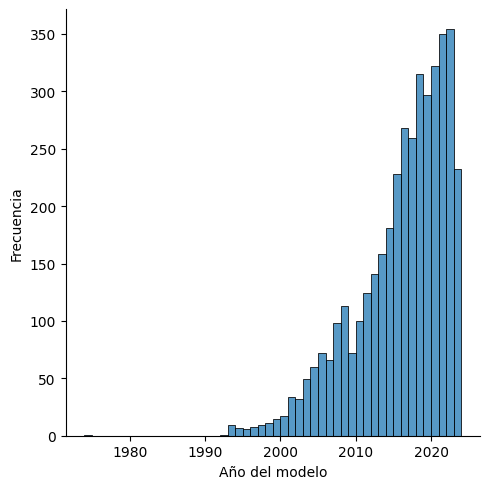

In [14]:
plt.figure()
sns.displot(df['model_year'])
plt.savefig(os.path.join('..','img','model_year_fig'))
plt.xlabel('Año del modelo')
plt.ylabel('Frecuencia')
plt.show()

In [15]:
df['model_year'].describe()

count    4009.000000
mean     2015.515590
std         6.104816
min      1974.000000
25%      2012.000000
50%      2017.000000
75%      2020.000000
max      2024.000000
Name: model_year, dtype: float64

In [16]:
# ¿Cuántos autos por año?
df['model_year'].value_counts()

model_year
2022    354
2021    350
2020    322
2018    315
2019    297
2016    268
2017    259
2015    228
2023    226
2014    181
2013    158
2012    141
2011    124
2008    113
2010    100
2007     98
2005     72
2009     72
2006     66
2004     60
2003     49
2001     34
2002     32
2000     17
1999     15
1998     11
1997      9
1993      9
1996      8
1994      7
2024      6
1995      6
1974      1
1992      1
Name: count, dtype: int64

In [17]:
df2['model_year'] = df['model_year'].copy()

### Milage

In [18]:
# Verificanco los valores de 'milage'
df['milage']

0       51,000 mi.
1       34,742 mi.
2       22,372 mi.
3       88,900 mi.
4        9,835 mi.
           ...    
4004       714 mi.
4005    10,900 mi.
4006     2,116 mi.
4007    33,000 mi.
4008    43,000 mi.
Name: milage, Length: 4009, dtype: object

In [19]:
# Se encuentra 'mi.' en todas las entradas de 'mi.'?
df['milage'].str.split().str[1].unique()

array(['mi.'], dtype=object)

In [20]:
# Extrayendo sólo los numeros, excluyendo 'mi'
df['milage'] = df['milage'].str.split().str[0]
# Convirtiendo la variable 'milage' a tipo numérico
df['milage'] = df['milage'].str.replace(",", "").astype(int)
df2['milage'] = df['milage'].copy()

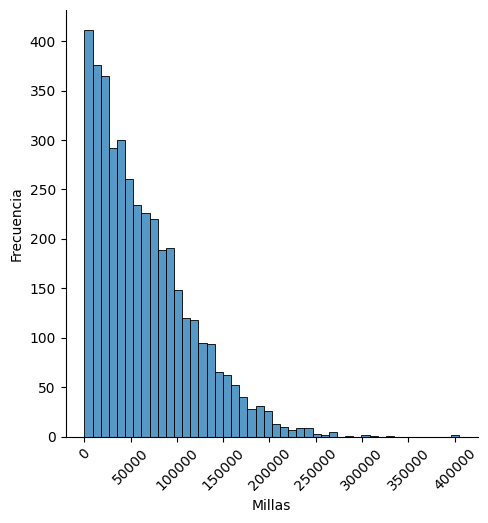

In [21]:
sns.displot(df['milage'])
plt.xlabel('Millas')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.savefig(os.path.join('..','img','milage_fig'))
plt.show()

In [22]:
# Estadísticos de 'milage'
df['milage'].describe()

count      4009.000000
mean      64717.551010
std       52296.599459
min         100.000000
25%       23044.000000
50%       52775.000000
75%       94100.000000
max      405000.000000
Name: milage, dtype: float64

### Fuel Type

In [23]:
# Cuántos tipos de combustible se encuentran en el dataset?
[print(x) for x in df['fuel_type'].unique()]

E85 Flex Fuel
Gasoline
Hybrid
nan
Diesel
Plug-In Hybrid
–
not supported


[None, None, None, None, None, None, None, None]

In [24]:
# Características de los autos que funcionan con combustible 'E85 Flex Fuel'
df[df['fuel_type']=='E85 Flex Fuel'][['brand','model','model_year','milage','engine','price']].sample(10)

,brand,model,model_year,milage,engine,price
3436,Ford,F-150 XL,2018,52500,395.0HP 5.0L 8 Cylinder Engine Flex Fuel Capab...,35000
2746,GMC,Yukon SLT,2014,142400,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,13500
1725,Chevrolet,Tahoe LTZ,2014,196300,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,10995
2305,Audi,Q5 2.0T Premium Plus,2015,118500,220.0HP 2.0L 4 Cylinder Engine Flex Fuel Capab...,15400
1740,Land,Rover Range Rover Sport Supercharged,2014,125000,510.0HP 5.0L 8 Cylinder Engine Flex Fuel Capab...,22500
2180,Ford,F-250 XLT,2019,124000,385.0HP 6.2L 8 Cylinder Engine Flex Fuel Capab...,40100
1574,Chevrolet,Silverado 2500 LT,2016,84421,360.0HP 6.0L 8 Cylinder Engine Flex Fuel Capab...,36800
863,Audi,A4 2.0T Premium,2015,91403,2.0L I4 16V GDI DOHC Turbo Flexible Fuel,14998
1863,Chrysler,200 C,2015,44000,295.0HP 3.6L V6 Cylinder Engine Flex Fuel Capa...,12700
179,Ford,Transit-350 XL,2018,95000,275.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,43000


In [25]:
# Características de los autos que funcionan con combustible 'Gasoline'
df[df['fuel_type']=='Gasoline'][['brand','model','model_year','milage','engine','price']].sample(10)

,brand,model,model_year,milage,engine,price
2981,Kia,Rio S,2021,67686,120.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,15700
2705,BMW,Z4 3.0si,2008,59257,255.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,18200
1407,BMW,Z4 sDrive28i,2016,59000,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,25000
3683,Jaguar,XK8 Base,1997,50000,290.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,6000
1913,Kia,K5 EX,2021,8263,180.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,29000
1827,BMW,X6 M Base,2018,54293,567.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,49000
3793,Volkswagen,Golf GTI 2.0T SE w/Performance Package 4-Door,2016,59250,220.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,18999
2105,Chevrolet,Camaro 2SS,2018,26000,455.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,39000
3055,Pontiac,Solstice GXP,2007,47000,260.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,13300
2125,Subaru,Impreza Premium,2022,10419,"2L H-4 gasoline direct injection, DOHC, variab...",24998


In [26]:
df[df['fuel_type']=='Gasoline'][['engine']].sample(10)

,engine
1600,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...
2626,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel
288,300.0HP 3.7L V6 Cylinder Engine Gasoline Fuel
2317,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel
1906,383.0HP 5.7L 8 Cylinder Engine Gasoline Fuel
3710,365.0HP 3.5L V6 Cylinder Engine Gasoline Fuel
760,315.0HP 2.7L V6 Cylinder Engine Gasoline Fuel
989,365.0HP 3.5L V6 Cylinder Engine Gasoline Fuel
1631,312.0HP 3.6L V6 Cylinder Engine Gasoline Fuel
406,3.6L V6 24V MPFI DOHC


In [27]:
df[df['fuel_type']=='not supported']

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
2894,Toyota,Mirai Limited,2021,44000,not supported,182.0HP Electric Motor Hydrogen Fuel,A/T,Gray,Black,None reported,Yes,18500
3700,Toyota,Mirai Base,2016,40000,not supported,151.0HP Electric Motor Hydrogen Fuel,A/T,Silver,Black,None reported,Yes,9500


In [28]:
df[df['fuel_type'].isna()][:10]

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
9,Tesla,Model X Long Range Plus,2020,34000,NaN,534.0HP Electric Motor Electric Fuel System,A/T,Black,Black,None reported,Yes,69950
44,Lucid,Air Grand Touring,2022,3552,NaN,536.0HP Electric Motor Electric Fuel System,1-Speed A/T,Red,Beige,None reported,Yes,119999
68,Lucid,Air Grand Touring,2022,4900,NaN,536.0HP Electric Motor Electric Fuel System,1-Speed A/T,Red,Black,None reported,Yes,99000
92,Rivian,R1S Adventure Package,2023,2800,NaN,835.0HP Electric Motor Electric Fuel System,1-Speed A/T,White,Green,None reported,Yes,92000
122,Rivian,R1S Adventure Package,2023,2500,NaN,835.0HP Electric Motor Electric Fuel System,A/T,Green,White,None reported,Yes,94000
129,Lucid,Air Pure,2023,1300,NaN,620.0HP Electric Motor Electric Fuel System,A/T,Black,Gray,NaN,NaN,86900
155,Tesla,Model 3 Performance,2022,13079,NaN,455.0HP Electric Motor Electric Fuel System,A/T,Black,White,None reported,Yes,47000
189,Tesla,Model Y Performance,2023,500,NaN,455.0HP Electric Motor Electric Fuel System,1-Speed A/T,Black,White,None reported,Yes,60000
225,Tesla,Model X Base,2023,8200,NaN,670.0HP Electric Motor Electric Fuel System,A/T,Black,Black,None reported,Yes,93999
236,Polestar,2 Launch Edition,2021,12172,NaN,Electric,1-Speed Automatic,Thunder Gray,Charcoal,None reported,NaN,35999


In [29]:
# Convirtiendo valores 'nan' a 'electric'
df['fuel_type'] = df['fuel_type'].replace(np.nan, 'electric')
# Convirtiendo valores 'bot supported' a 'hydrogen'
df['fuel_type'] = df['fuel_type'].replace('not supported', 'hydrogen')

df2['fuel_type'] = df['fuel_type'].copy()
df[df['fuel_type']=="–"]

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
130,Chrysler,Pacifica Touring,2017,87305,–,–,9-Speed A/T,Silver,Black,None reported,Yes,9000
257,Toyota,Land Cruiser Base,1993,231500,–,–,A/T,White,Gray,None reported,Yes,29500
338,Mazda,Mazda3 s Grand Touring,2016,85000,–,–,A/T,Black,Black,At least 1 accident or damage reported,Yes,18500
491,Chrysler,Pacifica Touring,2017,63000,–,–,9-Speed A/T,White,Beige,None reported,Yes,20000
692,Honda,Civic EX,1993,58981,–,–,A/T,White,Beige,None reported,Yes,9599
855,Ford,Bronco,1974,6217,–,–,–,Dark Gray Metallic,–,None reported,Yes,115000
923,Dodge,Challenger R/T,2010,100100,–,–,Transmission w/Dual Shift Mode,Purple,Black,None reported,Yes,17000
995,Dodge,Challenger R/T Scat Pack,2019,43000,–,–,6-Speed M/T,Green,Black,None reported,Yes,50000
1063,Mazda,Mazda6 i Grand Touring,2016,83100,–,–,A/T,White,White,None reported,Yes,17800
1083,Dodge,Challenger R/T,2010,73000,–,–,A/T,Black,Black,None reported,Yes,17500


### Engine

In [30]:
def extraer_caracteristicas_engine(engine):
    # Expresión regular para extraer la potencia 'hp'
    hp_pattern = r'(\d+\.\d+)HP'
    hp_matches = re.search(hp_pattern, engine)

    # Expresión regular para extraer la cilindrada 'L'
    cylinders_pattern = r'(\d+\.\d+)L'
    cylinders_matches = re.search(cylinders_pattern, engine)

    # Expresión regular para extraer el tipo de motor
    motor_pattern = r' (\w?\d+)'
    motor_matches = re.search(motor_pattern, engine)

    # Expresión regular para extraer el combustible
    fuel_pattern = r'(\w+\s?\w+\s?\w*) Fuel'
    fuel_matches = re.search(fuel_pattern, engine)

    # Asignar valores predeterminados en caso de no encontrar coincidencias
    hp = hp_matches.group(1) if hp_matches else None
    cylinders = cylinders_matches.group(1) if cylinders_matches else None
    motor = motor_matches.group(1) if motor_matches else None
    fuel = fuel_matches.group(1) if fuel_matches else None

    return hp, cylinders, motor, fuel


In [31]:
df['hp'], df['cylinders'], df['motor'], df['fuel_matches'] = zip(*df['engine'].apply(extraer_caracteristicas_engine))
df2['hp'], df2['cylinders'] = df['hp'], df['cylinders']

In [32]:
df.sample(5)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,hp,cylinders,motor,fuel_matches
2951,Ford,Explorer XLT,2014,127558,Gasoline,3.5L V6 24V MPFI DOHC,6-Speed Automatic,Green,Charcoal Black,None reported,Yes,13715,None,3.5,V6,None
3902,BMW,X5 M Base,2013,67000,Gasoline,555.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Black,At least 1 accident or damage reported,Yes,24500,555.0,4.4,4,Cylinder Engine Gasoline
3764,Audi,Q4 e-tron 50 Premium Plus,2022,250,electric,295.0HP Electric Motor Electric Fuel System,1-Speed A/T,Gray,Black,None reported,Yes,52000,295.0,None,None,Electric Motor Electric
2748,Nissan,Xterra S,2012,80000,Gasoline,261.0HP 4.0L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Gray,None reported,Yes,14800,261.0,4.0,4,Cylinder Engine Gasoline
2409,Nissan,Altima 2.5 SL,2012,91545,Gasoline,175.0HP 2.5L 4 Cylinder Engine Gasoline Fuel,CVT Transmission,Silver,Black,None reported,Yes,8999,175.0,2.5,2,Cylinder Engine Gasoline


In [33]:
df['engine']

0       300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...
1                                    3.8L V6 24V GDI DOHC
2                                          3.5 Liter DOHC
3       354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...
4                              2.0L I4 16V GDI DOHC Turbo
                              ...                        
4004                     6.0L W12 48V PDI DOHC Twin Turbo
4005        349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel
4006                                             Electric
4007        450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel
4008         248.0HP 2.0L 4 Cylinder Engine Gasoline Fuel
Name: engine, Length: 4009, dtype: object

### Transmission

In [34]:
# ¿Cuántos tipos de transmisón?
df['transmission'].nunique()

62

In [35]:
# Transmisiones
df['transmission'].unique()

array(['6-Speed A/T', '8-Speed Automatic', 'Automatic', '7-Speed A/T',
       'F', 'A/T', '8-Speed A/T', 'Transmission w/Dual Shift Mode',
       '9-Speed Automatic', '6-Speed M/T', '10-Speed A/T', '9-Speed A/T',
       '5-Speed A/T', '1-Speed A/T', 'Automatic CVT',
       '7-Speed Automatic with Auto-Shift', 'CVT-F', 'M/T',
       '6-Speed Automatic with Auto-Shift', '10-Speed Automatic',
       'CVT Transmission', '4-Speed A/T', '6-Speed Automatic',
       '4-Speed Automatic', '7-Speed M/T',
       '8-Speed Automatic with Auto-Shift', '5-Speed Automatic',
       '8-SPEED AT', '1-Speed Automatic', '5-Speed M/T', 'Manual',
       '6-Speed Manual', 'Variable', '2', '7-Speed Manual',
       'Automatic, 9-Spd 9G-Tronic', 'Automatic, 8-Spd',
       'Automatic, 8-Spd Sport w/Sport & Manual Modes', '–',
       'Auto, 6-Spd w/CmdShft', 'Transmission Overdrive Switch',
       '7-Speed Automatic', 'Automatic, 8-Spd PDK Dual-Clutch',
       'Automatic, 8-Spd M STEPTRONIC w/Drivelogic, Sport & Ma

In [36]:
# Extrayendo las velocidades de la variable 'transmission'
df['speed'] = df['transmission'].str.extract(r'(\d+)')

df2['speed'] = df['speed'].copy()

In [37]:
def extraer_transmision(variable):
    """
    Esta función toma una variable que representa el tipo de transmisión de un vehículo
    y devuelve una categoría estandarizada (manual, automático, dual o 'other').
    """
    
    variable = variable.lower()
    tipos_de_transmision = {'manual': ['manual', 'mt', 'm/t'],
                            'automatic': ['automatic', 'a/t', 'at'],
                            'dual': ['dual', 'at/mt']}
    
    for tipo, etiquetas in tipos_de_transmision.items():
        if any(etiqueta in variable for etiqueta in etiquetas):
            return tipo
    
    return 'other'


In [38]:
# Aplicar la función para extraer el texto deseado y crear una nueva columna
df['transmission_'] = df['transmission'].apply(extraer_transmision)

df2['transmission'] = df['transmission_'].copy()

In [39]:
df.sample(5)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,hp,cylinders,motor,fuel_matches,speed,transmission_
1316,Porsche,Taycan Base,2021,6785,electric,Electric,2-Speed Automatic,Gentian Blue Metallic,Black,None reported,NaN,108900,None,None,None,None,2,automatic
2554,Porsche,911 GT3,2015,23700,Gasoline,475.0HP 3.8L Flat 6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,144940,475.0,3.8,3,Cylinder Engine Gasoline,NaN,dual
890,Porsche,Cayenne S,2013,92000,Gasoline,400.0HP 4.8L 8 Cylinder Engine Gasoline Fuel,8-Speed A/T,Green,Gray,None reported,Yes,23000,400.0,4.8,4,Cylinder Engine Gasoline,8,automatic
3452,Chevrolet,Silverado 1500 LT Trail Boss,2020,49000,Gasoline,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,44900,355.0,5.3,5,Cylinder Engine Gasoline,NaN,automatic
2680,Ford,Thunderbird Deluxe,2002,40110,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Yellow,Black,None reported,Yes,18500,252.0,3.9,3,Cylinder Engine Gasoline,NaN,automatic


### Accident

In [40]:
# ¿Cuántos valores únicos?
df['accident'].nunique()

2

In [41]:
# Valores únicos
df['accident'].unique()

array(['At least 1 accident or damage reported', 'None reported', nan],
      dtype=object)

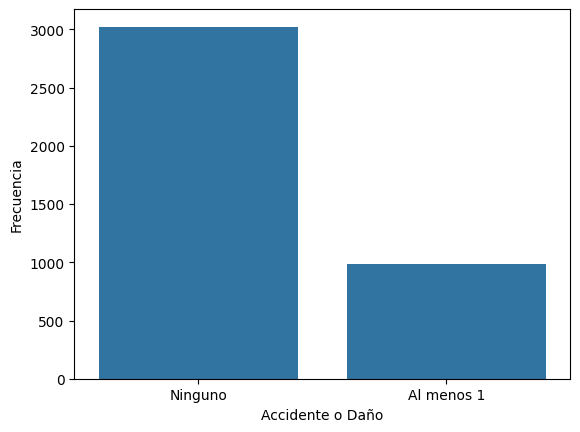

In [42]:
# Convierto los valores nulos a 'None reported'
df['accident'] = df['accident'].fillna('None reported')
df2['accident'] = df['accident'].copy()

sns.barplot(df['accident'].value_counts())
plt.xticks(ticks=['None reported','At least 1 accident or damage reported'], labels=['Ninguno', 'Al menos 1'])
plt.xlabel('Accidente o Daño')
plt.ylabel('Frecuencia')
plt.show()

In [43]:
# ¿Cuántos accidentes o daños?
df['accident'].value_counts()

accident
None reported                             3023
At least 1 accident or damage reported     986
Name: count, dtype: int64

In [44]:
# Porcentaje de autos accidentados
(df['accident'].value_counts() / df['accident'].count() * 100).round(1)

accident
None reported                             75.4
At least 1 accident or damage reported    24.6
Name: count, dtype: float64

### Clean Title

In [45]:
# ¿Cuántos valores únicos?
df['clean_title'].nunique(dropna=False)

2

In [46]:
df['clean_title'].value_counts(dropna=False)

clean_title
Yes    3413
NaN     596
Name: count, dtype: int64

In [47]:
(df['clean_title'].value_counts() / df['clean_title'].count() * 100).round(1)

clean_title
Yes    100.0
Name: count, dtype: float64

In [48]:
# Reemplazo valores nulos por 'no'
df['clean_title'].fillna('no', inplace=True)
df2['clean_title'] = df['clean_title'].copy()

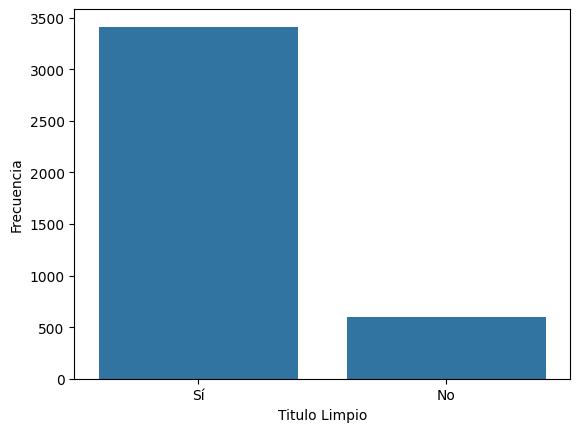

In [49]:
sns.barplot(df['clean_title'].value_counts())
plt.xticks(ticks=['Yes', 'no'], labels=['Sí', 'No'])
plt.xlabel('Titulo Limpio')
plt.ylabel('Frecuencia')
plt.savefig(os.path.join('..','img','title_fig'))
plt.show()

In [50]:
df2

,price,model_year,milage,fuel_type,hp,cylinders,speed,transmission,accident,clean_title
0,10300,2013,51000,E85 Flex Fuel,300.0,3.7,6,automatic,At least 1 accident or damage reported,Yes
1,38005,2021,34742,Gasoline,None,3.8,8,automatic,At least 1 accident or damage reported,Yes
2,54598,2022,22372,Gasoline,None,None,NaN,automatic,None reported,no
3,15500,2015,88900,Hybrid,354.0,3.5,7,automatic,None reported,Yes
4,34999,2021,9835,Gasoline,None,2.0,8,automatic,None reported,no
...,...,...,...,...,...,...,...,...,...,...
4004,349950,2023,714,Gasoline,None,6.0,8,automatic,None reported,Yes
4005,53900,2022,10900,Gasoline,349.0,3.0,NaN,dual,None reported,Yes
4006,90998,2022,2116,electric,None,None,NaN,automatic,None reported,no
4007,62999,2020,33000,Gasoline,450.0,3.5,NaN,automatic,None reported,Yes
